In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [98]:
from google.colab import files
upload = files.upload()

Saving Company_Data.csv to Company_Data (3).csv


In [99]:
df=pd.read_csv("Company_Data.csv")
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [100]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [101]:
# List continuous columns
continuous_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
continuous_columns

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

In [102]:
# List categorical columns
categorical_columns = [col for col in df.columns if df[col].dtype == 'object' or pd.api.types.is_categorical_dtype(df[col])]
categorical_columns

['ShelveLoc', 'Urban', 'US']

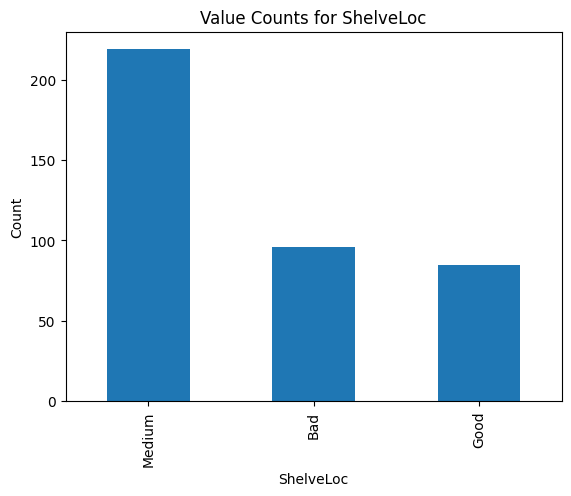

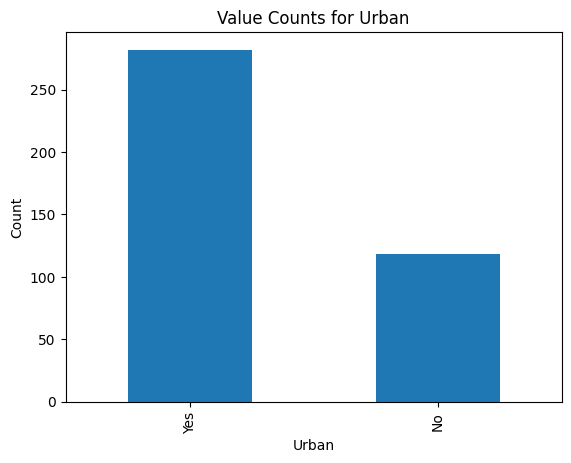

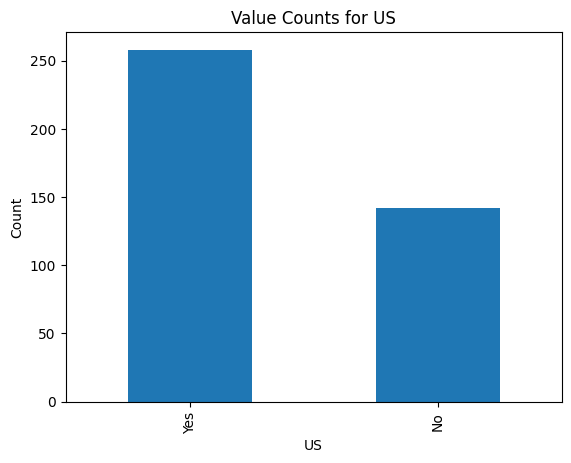

In [103]:
for col in categorical_columns:
    value_counts = df[col].value_counts()
    value_counts.plot(kind='bar')
    plt.title(f'Value Counts for {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [104]:
df.shape

(400, 11)

In [105]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

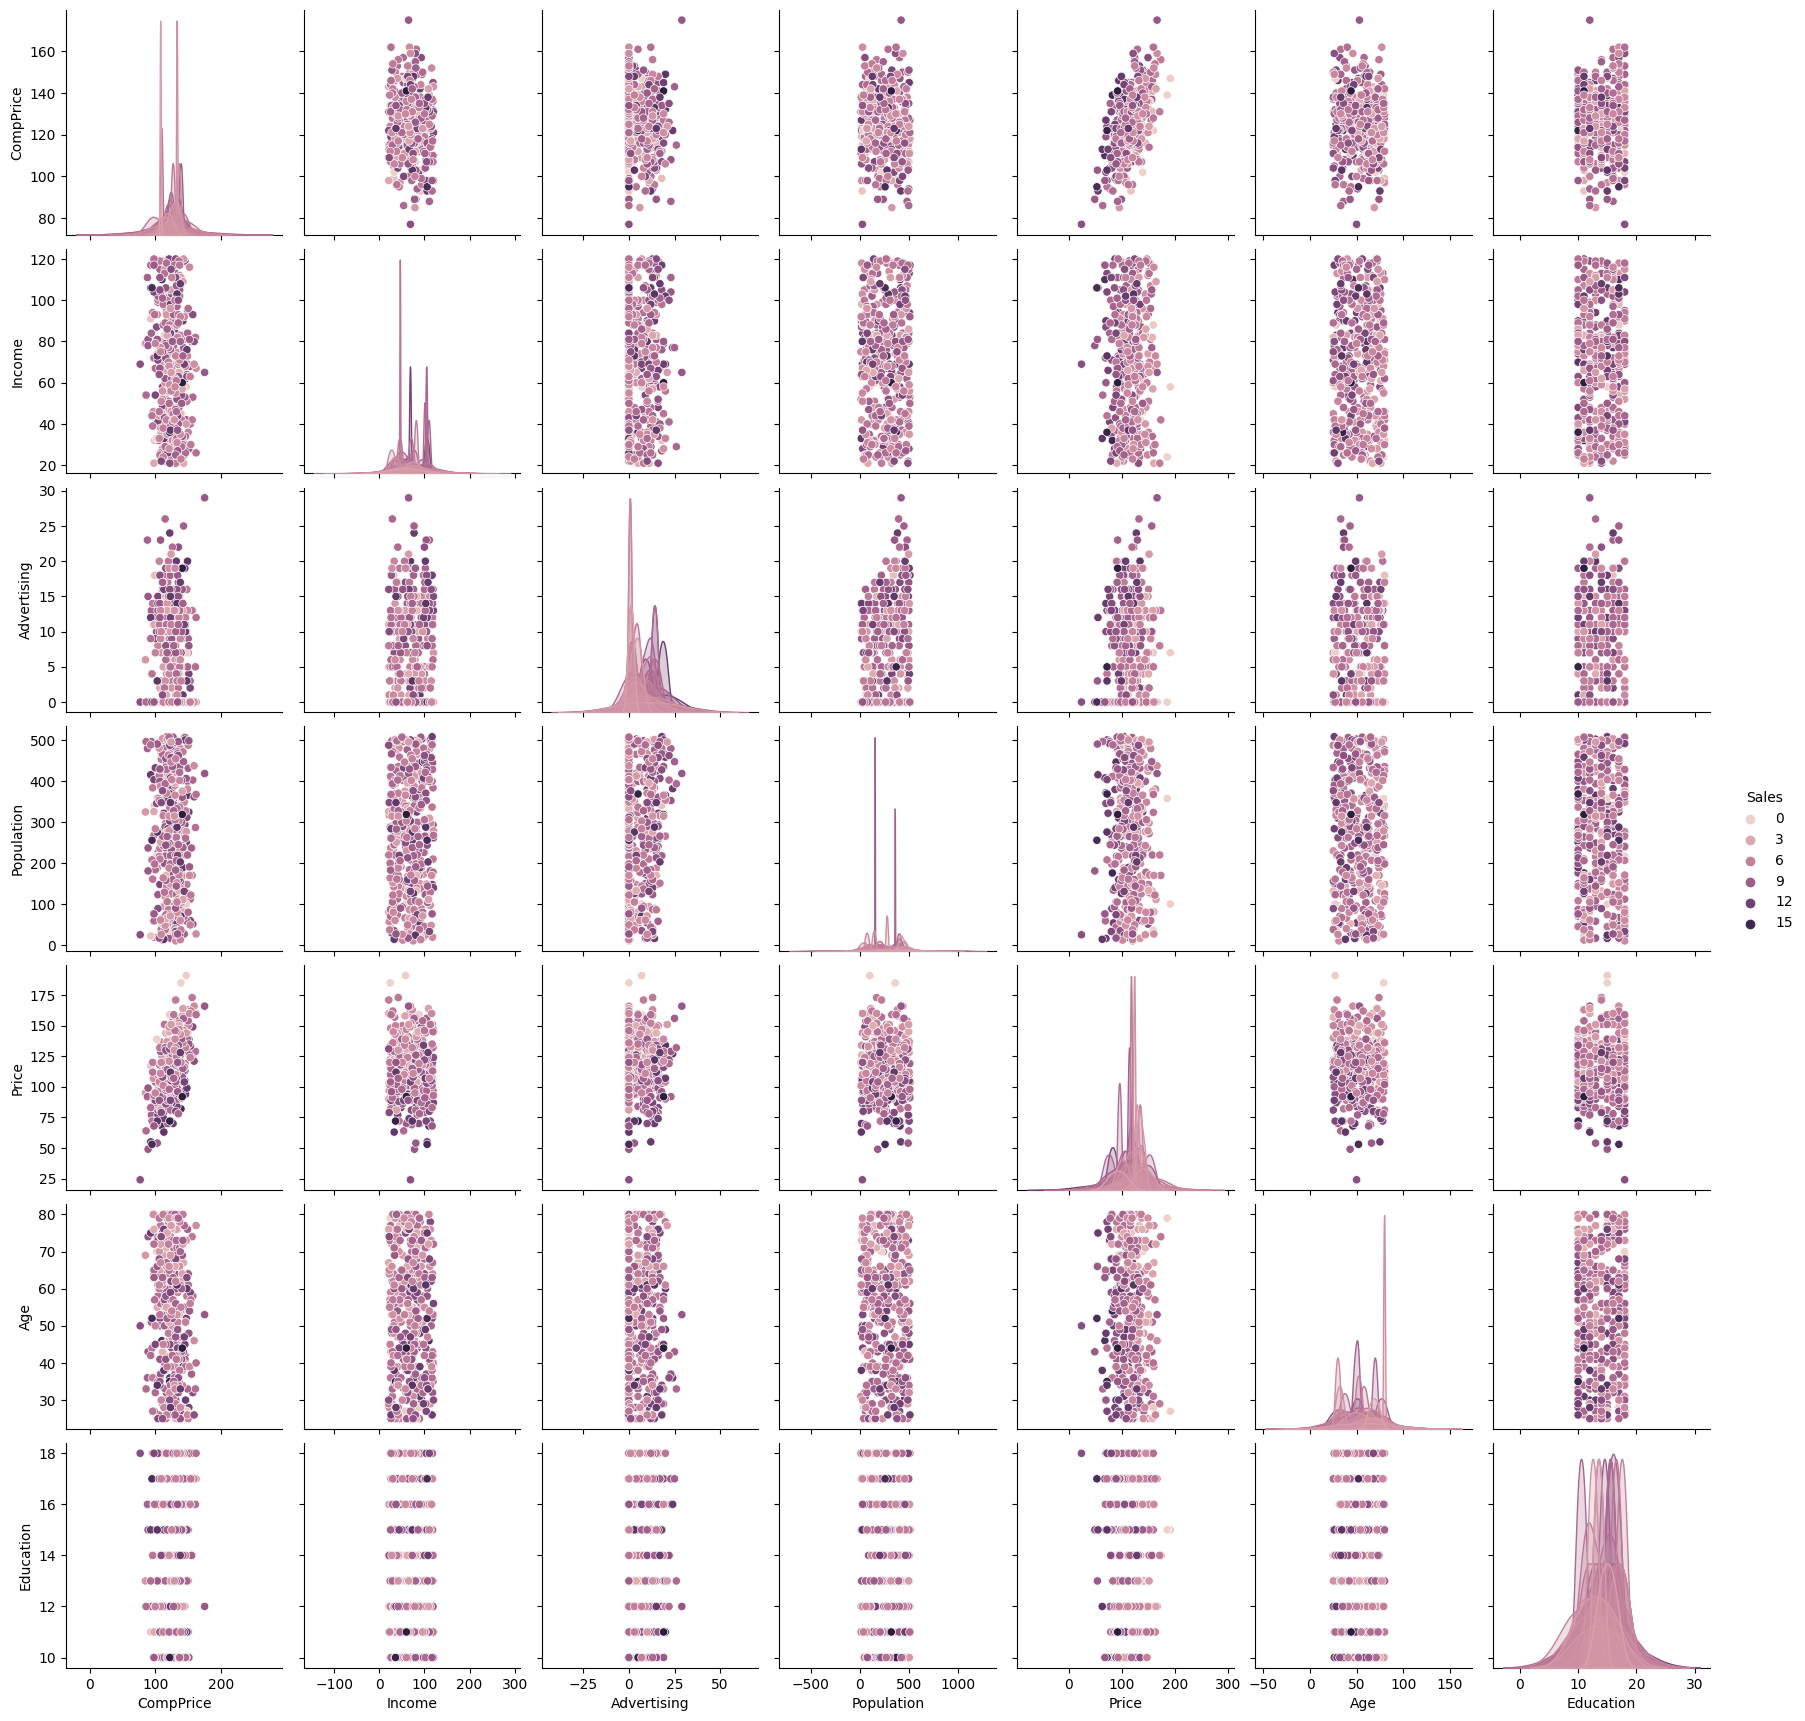

In [106]:
sns.pairplot(data=df, hue = 'Sales')

In [107]:
df.corr()

<ipython-input-107-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<ipython-input-108-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

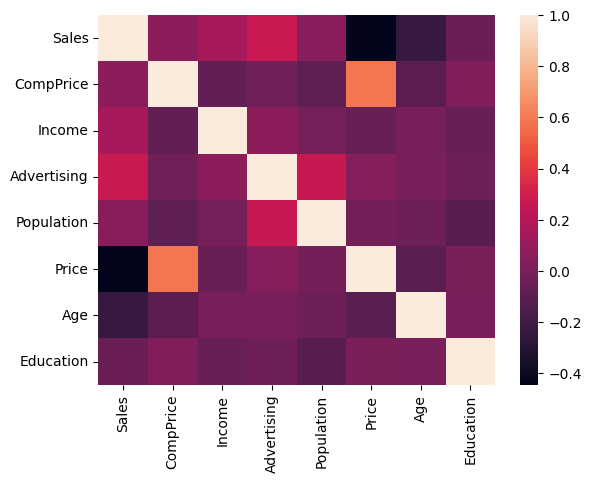

In [108]:
sns.heatmap(df.corr())

In [109]:
median_sales=df["Sales"].median()
df["Sales"] = ["High" if value > median_sales
               else "Low" for value in df["Sales"]]
df["Sales"]

0      High
1      High
2      High
3       Low
4       Low
       ... 
395    High
396     Low
397     Low
398     Low
399    High
Name: Sales, Length: 400, dtype: object

In [110]:
LE=LabelEncoder()
column_to_encode=["ShelveLoc","Urban","US","Sales"]
for column in column_to_encode:
  df[column]=LE.fit_transform(df[column])
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,138,73,11,276,120,0,42,17,1,1
1,0,111,48,16,260,83,1,65,10,1,1
2,0,113,35,10,269,80,2,59,12,1,1
3,1,117,100,4,466,97,2,55,14,1,1
4,1,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,138,108,17,203,128,1,33,14,1,1
396,1,139,23,3,37,120,2,55,11,0,1
397,1,162,26,12,368,159,2,40,18,1,1
398,1,100,79,7,284,95,0,50,12,1,1


In [111]:
X=df.iloc[:,1:]
Y=df["Sales"]

In [112]:
cont_cols = [col for col in X.columns if pd.api.types.is_numeric_dtype(X[col])]
cat_cols = [col for col in X.columns if X[col].dtype == 'object' or pd.api.types.is_categorical_dtype(X[col])]

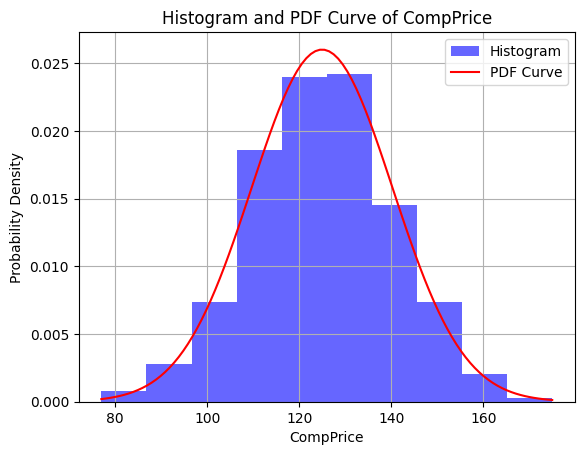

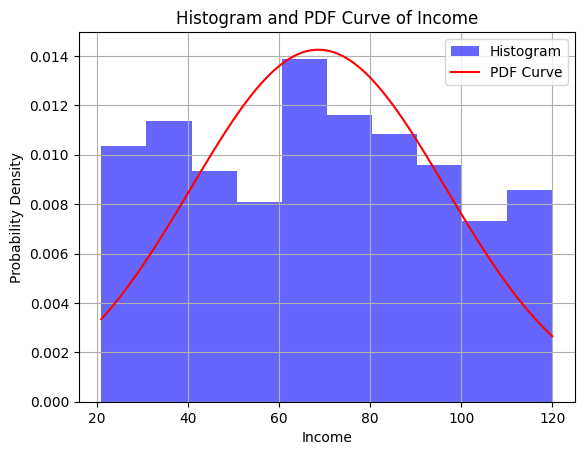

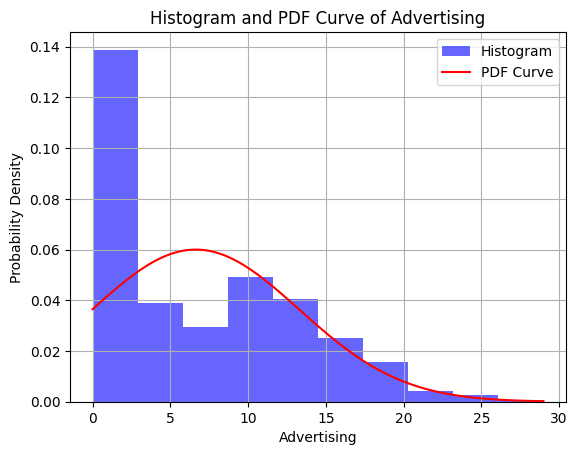

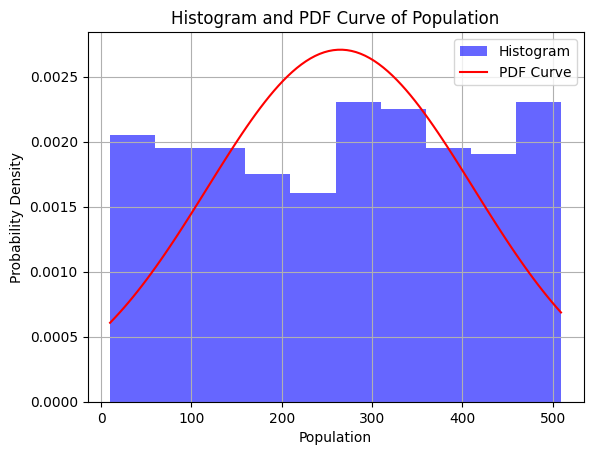

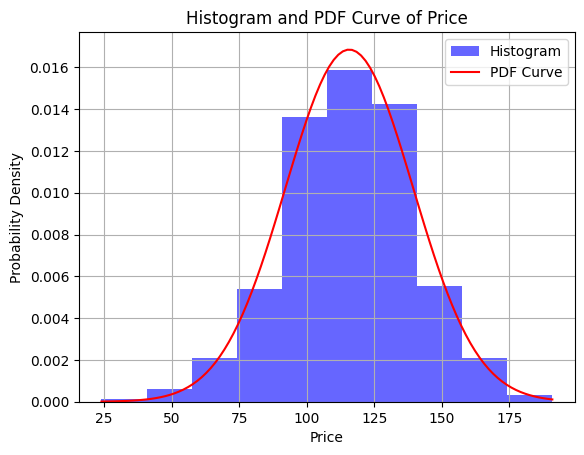

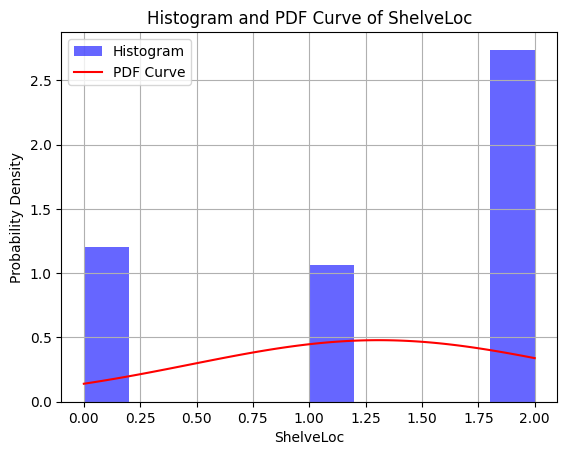

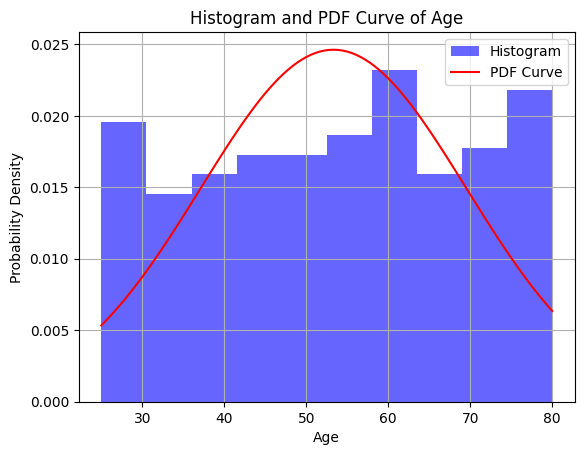

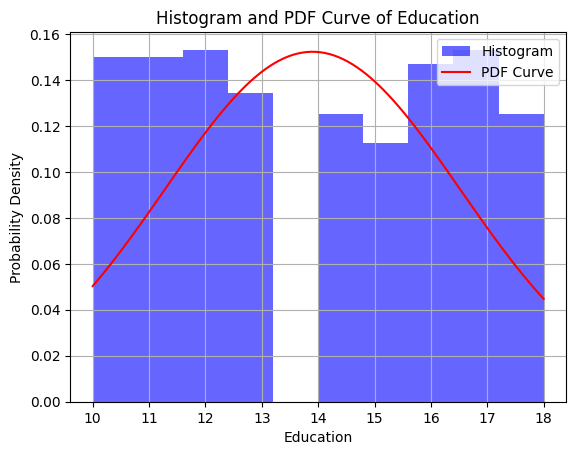

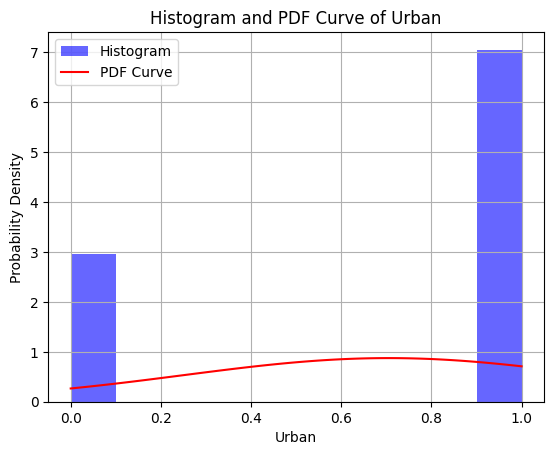

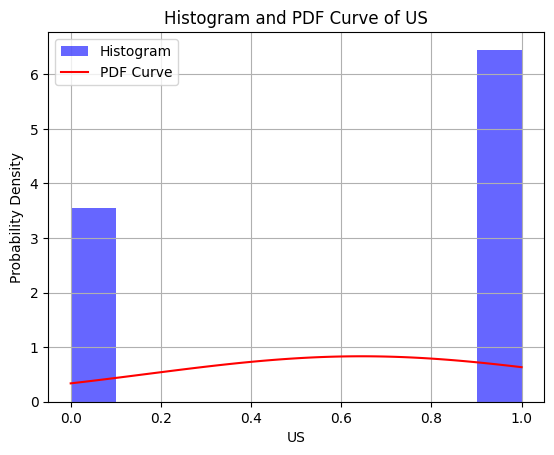

In [113]:
for col in cont_cols:
    X[col].hist(density=True, alpha=0.6, color='b', label='Histogram')

    # Compute the PDF curve
    mu, std = X[col].mean(), X[col].std()
    x = np.linspace(X[col].min(), X[col].max(), 100)
    pdf = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / std) ** 2)

    # Plot the PDF curve
    plt.plot(x, pdf, 'r', label='PDF Curve')

    # Add labels and title
    plt.xlabel(col)
    plt.ylabel('Probability Density')
    plt.title(f'Histogram and PDF Curve of {col}')
    plt.legend()

    # Show the histogram with the curve
    plt.show()

In [114]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=47)

In [115]:
DT = DecisionTreeClassifier(criterion='gini',max_depth=8)
DT.fit(X_train,Y_train)
Y_pred_train = DT.predict(X_train)
Y_pred_test = DT.predict(X_test)

In [116]:
ac1=accuracy_score(Y_train, Y_pred_train)
ac2=accuracy_score(Y_test, Y_pred_test)
print('Training accuracy: ',ac1)
print('Test accuracy: ',ac2)

Training accuracy:  0.9821428571428571
Test accuracy:  0.7666666666666667


In [117]:
print("No. of nodes: ", DT.tree_.node_count)
print("level of depth: ", DT.tree_.max_depth)

No. of nodes:  87
level of depth:  8


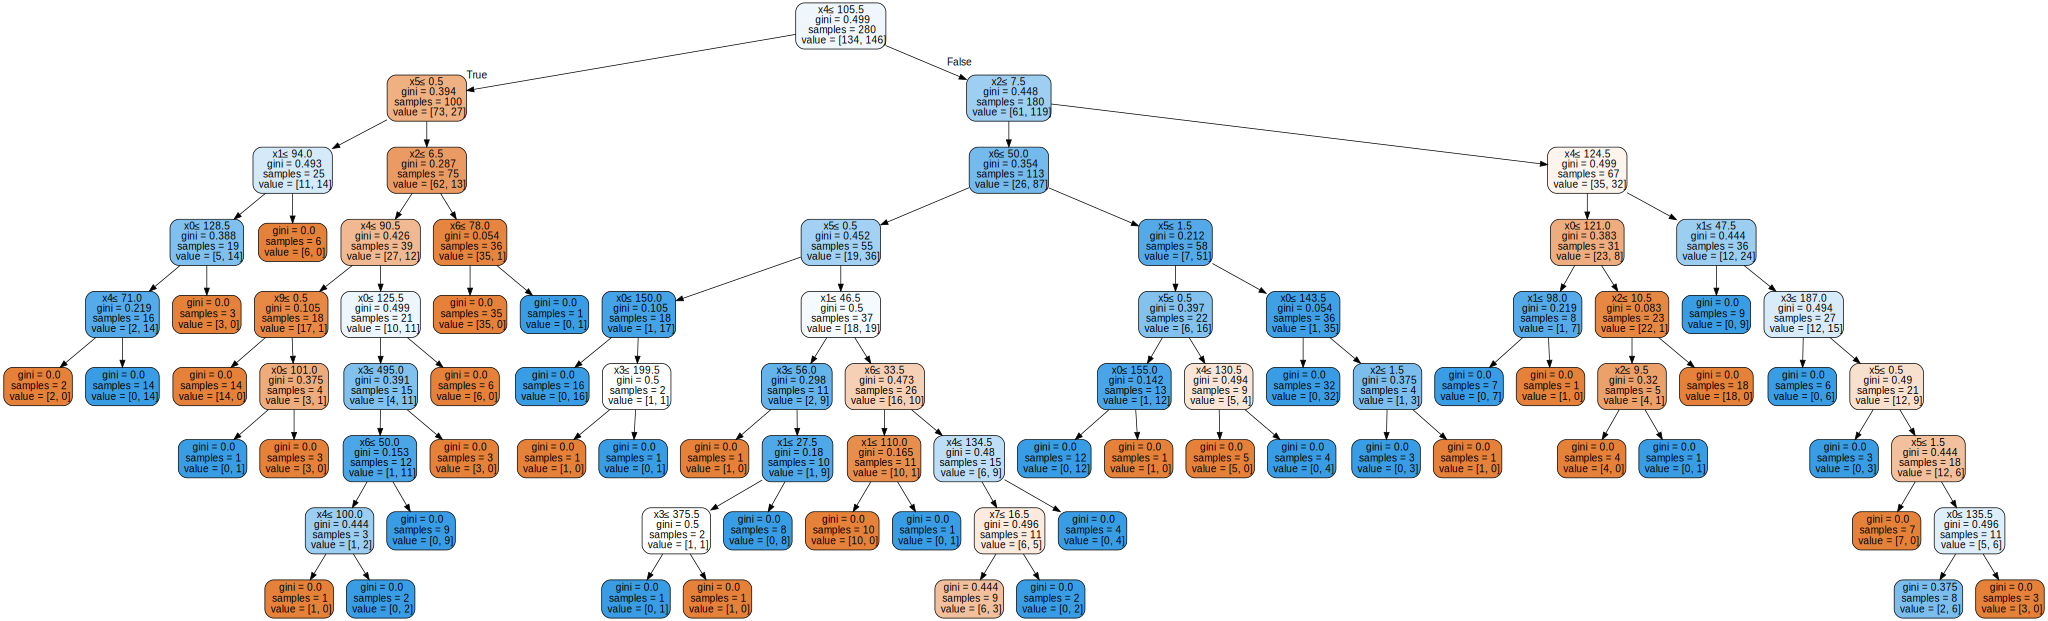

In [118]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(DT,filled= True,rounded=True,special_characters= True)
graph = graphviz.Source(dot_data)
graph

In [119]:
# validation set approach
training_accuracy = []
test_accuracy = []

for i in range(1,100):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,random_state=i,test_size=0.3)
    DT = DecisionTreeClassifier(criterion='gini', max_depth=8)
    DT.fit(x_train,y_train)
    y_pred_train = DT.predict(x_train)
    y_pred_test = DT.predict(x_test)
    training_accuracy.append(accuracy_score(y_train,y_pred_train))
    test_accuracy.append(accuracy_score(y_test,y_pred_test))

print("Average Training Accuracy",np.mean(training_accuracy).round(3))
print("Average Testing Accuracy",np.mean(test_accuracy).round(3))

Average Training Accuracy 0.975
Average Testing Accuracy 0.707


This Decision Tree Classifier is good in predicting the 'Sales' categorical variable with average training accuracy of 0.98 and average testing accuracy of 0.71 approximately